In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('letter-recognition.csv')

In [ ]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


<Axes: xlabel='letter', ylabel='count'>

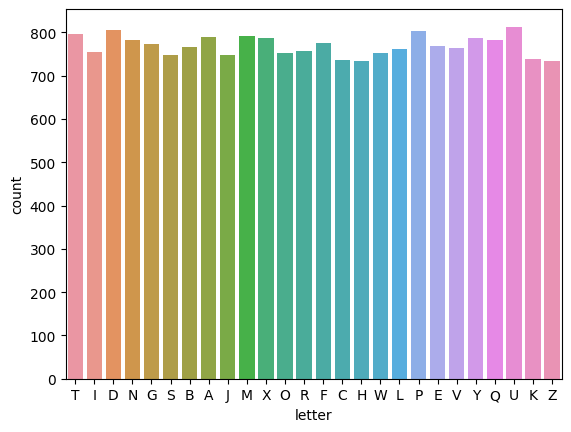

In [ ]:
sns.countplot(x=df['letter'])

In [ ]:
df['letter'].nunique()

26

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop('letter',axis=1)
Y=df['letter']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(C=1,kernel='linear')
svc.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

In [ ]:
svc.score(X_test,Y_test)

0.85025

In [ ]:
# 2nd way of finding accuracy
Y_pred=svc.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(Y_test,Y_pred)

0.85025

In [ ]:
svc=SVC(C=1,kernel='rbf')

In [ ]:
svc.fit(X_train,Y_train)

SVC(C=1)

In [ ]:
svc.score(X_test,Y_test)

0.944

In [ ]:
from sklearn.model_selection import GridSearchCV
param={'gamma':[1e-3,1e-2,1e-1,1,10],
       'C':[1,10,100,1000]}
model_cv=GridSearchCV(SVC(kernel='rbf'),param_grid=param,scoring='accuracy',n_jobs=-1,return_train_score=True,cv=3,verbose=1)
model_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
result=model_cv.cv_results_
result=pd.DataFrame(result)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.917502,0.180364,5.176680,0.030158,1,0.001,"{'C': 1, 'gamma': 0.001}",0.682040,0.672417,0.673730,0.676062,0.004261,16,0.691449,0.683697,0.677604,0.684250,0.005666
1,3.853131,0.381671,4.749083,0.481112,1,0.01,"{'C': 1, 'gamma': 0.01}",0.834271,0.829364,0.830302,0.831312,0.002127,14,0.845022,0.840442,0.840442,0.841969,0.002159
2,3.526893,0.401935,4.028933,1.304229,1,0.1,"{'C': 1, 'gamma': 0.1}",0.945257,0.940371,0.941684,0.942437,0.002064,5,0.967842,0.970095,0.967470,0.968469,0.001160
3,18.491040,0.560508,4.737231,0.383347,1,1,"{'C': 1, 'gamma': 1}",0.927634,0.928371,0.919745,0.925250,0.003904,10,0.999719,0.999719,0.999906,0.999781,0.000088
4,19.858001,0.645163,6.152702,0.379988,1,10,"{'C': 1, 'gamma': 10}",0.217098,0.230639,0.237952,0.228563,0.008639,20,1.000000,1.000000,1.000000,1.000000,0.000000
5,4.195059,0.431605,4.361438,0.129047,10,0.001,"{'C': 10, 'gamma': 0.001}",0.810086,0.808738,0.811176,0.810000,0.000997,15,0.819051,0.816818,0.818599,0.818156,0.000964
6,2.110858,0.022076,3.129428,0.446794,10,0.01,"{'C': 10, 'gamma': 0.01}",0.906074,0.900244,0.908869,0.905062,0.003593,11,0.924339,0.928940,0.926034,0.926437,0.001900
7,3.044502,0.236131,3.178026,0.315481,10,0.1,"{'C': 10, 'gamma': 0.1}",0.968129,0.962685,0.965498,0.965437,0.002223,1,0.997187,0.997844,0.997281,0.997437,0.000290
8,18.493809,0.294258,4.559152,0.270388,10,1,"{'C': 10, 'gamma': 1}",0.930446,0.928558,0.921808,0.926937,0.003708,7,1.000000,1.000000,1.000000,1.000000,0.000000
9,19.286577,0.197879,6.406586,0.338480,10,10,"{'C': 10, 'gamma': 10}",0.245594,0.260079,0.263829,0.256501,0.007862,17,1.000000,1.000000,1.000000,1.000000,0.000000


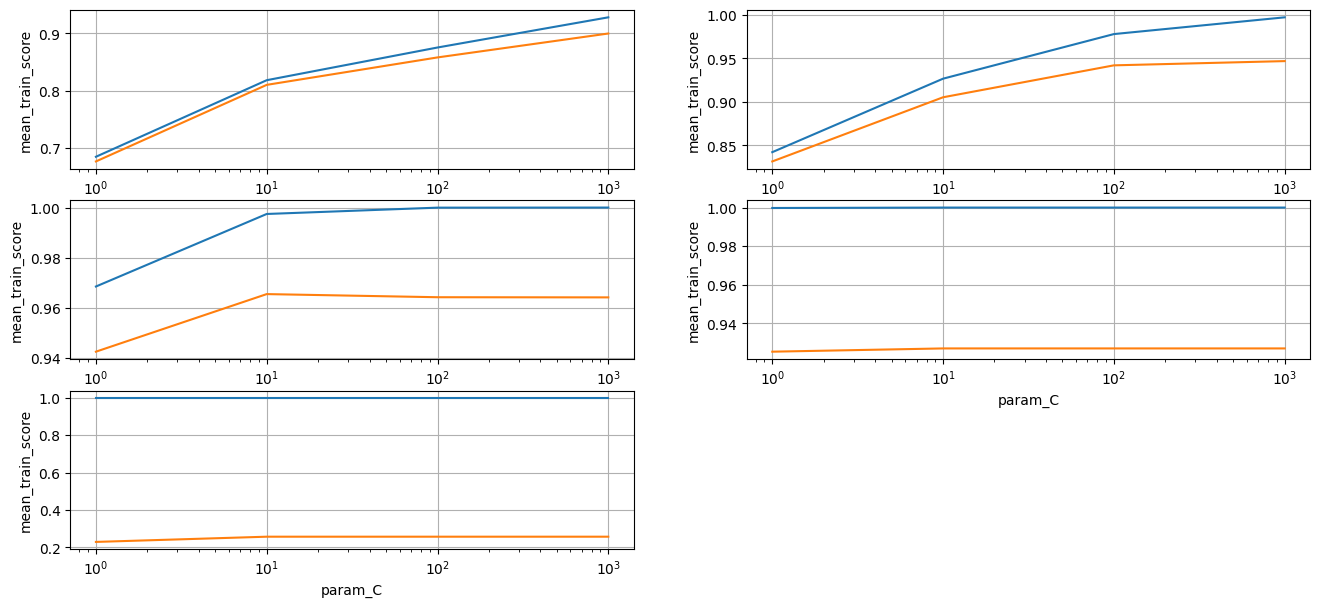

In [ ]:
#result['param_C']=result['param_C'].astype('int')
plt.figure(figsize=(16,7))
plt.subplot(321)
gamma1=result[result['param_gamma']==0.001]
gamma2=result[result['param_gamma']==0.01]
gamma3=result[result['param_gamma']==0.1]
gamma4=result[result['param_gamma']==1]
gamma5=result[result['param_gamma']==10]
sns.lineplot(y=gamma1['mean_train_score'],x=gamma1['param_C'])
sns.lineplot(y=gamma1['mean_test_score'],x=gamma1['param_C'])
plt.xscale('log')
plt.grid()
plt.subplot(322)
sns.lineplot(y=gamma2['mean_train_score'],x=gamma2['param_C'])
sns.lineplot(y=gamma2['mean_test_score'],x=gamma2['param_C'])
plt.xscale('log')
plt.grid()
plt.subplot(323)
sns.lineplot(y=gamma3['mean_train_score'],x=gamma3['param_C'])
sns.lineplot(y=gamma3['mean_test_score'],x=gamma3['param_C'])
plt.xscale('log')
plt.grid()
plt.subplot(324)
sns.lineplot(y=gamma4['mean_train_score'],x=gamma4['param_C'])
sns.lineplot(y=gamma4['mean_test_score'],x=gamma4['param_C'])
plt.xscale('log')
plt.grid()
plt.subplot(325)
sns.lineplot(y=gamma5['mean_train_score'],x=gamma5['param_C'])
sns.lineplot(y=gamma5['mean_test_score'],x=gamma5['param_C'])
plt.xscale('log')
plt.grid()

In [ ]:
model_cv.best_score_

0.9654373317717434

In [ ]:
best_params=model_cv.best_params_
best_params

{'C': 10, 'gamma': 0.1}

In [ ]:
best_c=best_params['C']
best_gamma=best_params['gamma']

In [ ]:
svc=SVC(C=best_c,gamma=best_gamma,kernel='rbf')
svc.fit(X_train,Y_train)

SVC(C=10, gamma=0.1)

In [ ]:
svc.score(X_test,Y_test)

0.97875